# Linear Regression from Scratch

![Linear Regression](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

This notebook implements linear regression from scratch using gradient descent algorithm. We'll build a simple linear regression model to predict scores based on study hours.

## Overview

- Load and visualize the data
- Implement the loss function (Mean Squared Error)
- Implement gradient descent optimization
- Train the model and visualize results
- Make predictions

## Import Required Libraries

We'll import the necessary libraries:

- `pandas` for data manipulation and analysis
- `matplotlib.pyplot` for data visualization


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

## Load the Dataset

Load the score dataset from a CSV file. This dataset contains information about study hours and corresponding scores.

Source: [Scores Dataset](https://www.kaggle.com/datasets/himanshunakrani/student-study-hours)

In [13]:
data = pd.read_csv("data/score.csv")

## Data Preprocessing

Restructure the data into a more convenient format with:

- `x`: Independent variable (Hours studied)
- `y`: Dependent variable (Scores achieved)


In [14]:
data = pd.DataFrame({"x": data.Hours, "y": data.Scores})

## Explore the Data

Let's examine our dataset to understand the structure and see the relationship between study hours and scores.


In [15]:
data.head()

,x,y
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
data.size

50

## Visualize the Data

Create a scatter plot to visualize the relationship between study hours (x) and scores (y). This helps us understand if there's a linear relationship in the data.


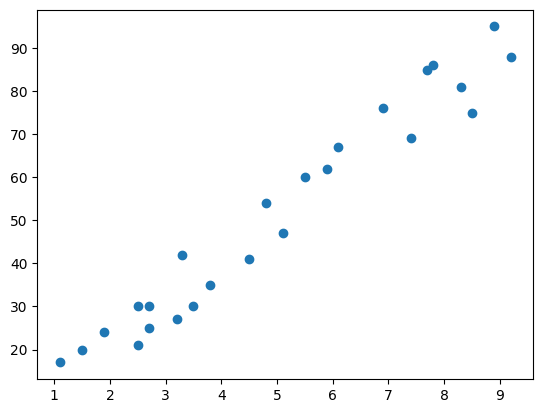

In [17]:
plt.scatter(data["x"], data["y"]);

## Define the Loss Function

Implement the Mean Squared Error (MSE) loss function. This function calculates how far our predictions are from the actual values.

The formula is: MSE = (1/n) × Σ(y_actual - y_predicted)²

Where:

- `m` is the slope of the line
- `b` is the y-intercept
- The predicted value is `m*x + b`


In [18]:
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i]["x"]
        y = points.iloc[i]["y"]
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

## Implement Gradient Descent

Gradient descent is the optimization algorithm that helps us find the best values for slope (m) and intercept (b).

The algorithm calculates:

- **m_gradient**: The partial derivative of the loss function with respect to slope (m)
- **b_gradient**: The partial derivative of the loss function with respect to intercept (b)

Then updates the parameters:

- **m_new** = m_current - (learning_rate × m_gradient)
- **b_new** = b_current - (learning_rate × b_gradient)


In [19]:
def gradient_descent(m_now, b_now, points, lr):
    m_gradient = 0
    b_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i]["x"]
        y = points.iloc[i]["y"]
        m_gradient += -(2 / n) * x * (y - (m_now * x + b_now))
        b_gradient += -(2 / n) * (y - (m_now * x + b_now))
    m_new = m_now - (lr * m_gradient)
    b_new = b_now - (lr * b_gradient)
    return m_new, b_new

## Initialize Parameters

Set up the initial parameters for our linear regression model:

- **m**: Slope (initially 0)
- **b**: Y-intercept (initially 0)
- **lr**: Learning rate (0.0001) - controls how big steps we take during optimization


In [20]:
m = 0
b = 0
lr = 0.0001

## Train the Model

Now we'll train our linear regression model using gradient descent:

1. **Run for 1000 epochs** (iterations)
2. **Monitor progress** by printing the loss every 100 epochs
3. **Update parameters** (m and b) using gradient descent
4. **Visualize results** by plotting the data points and the fitted line

The red line represents our learned linear regression model.


Epoch 0: Loss = 3264.04
Epoch 100: Loss = 922.9847912910558
Epoch 100: Loss = 922.9847912910558
Epoch 200: Loss = 276.0644547372399
Epoch 200: Loss = 276.0644547372399
Epoch 300: Loss = 97.29578876833197
Epoch 300: Loss = 97.29578876833197
Epoch 400: Loss = 47.894623554624815
Epoch 400: Loss = 47.894623554624815
Epoch 500: Loss = 34.242454680637124
Epoch 500: Loss = 34.242454680637124
Epoch 600: Loss = 30.469052185510176
Epoch 600: Loss = 30.469052185510176
Epoch 700: Loss = 29.425521675044656
Epoch 700: Loss = 29.425521675044656
Epoch 800: Loss = 29.136361114306325
Epoch 800: Loss = 29.136361114306325
Epoch 900: Loss = 29.05566671536746
Epoch 900: Loss = 29.05566671536746
m: 9.896964110671043, b: 1.6314708810783125
m: 9.896964110671043, b: 1.6314708810783125


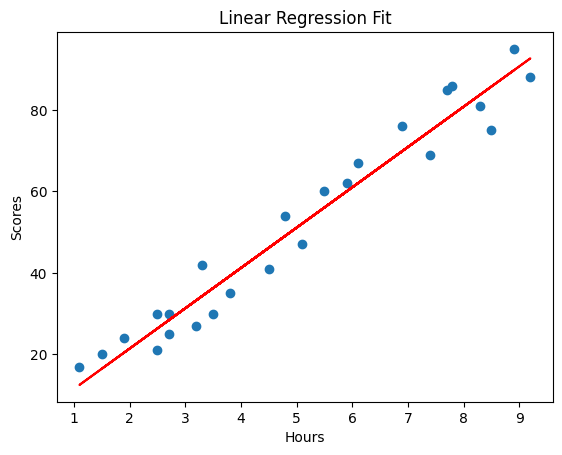

In [21]:
epochs = 1000
for i in range(epochs):
    if i % 100 == 0:
        print(f"Epoch {i}: Loss = {loss_function(m, b, data)}")
    m, b = gradient_descent(m, b, data, lr)

print(f"m: {m}, b: {b}")
plt.scatter(data["x"], data["y"])
plt.plot(data["x"], m * data["x"] + b, color="red")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Linear Regression Fit");

## Make Predictions

Now that our model is trained, we can use it to make predictions. Let's predict the score for a student who studies for 5 hours.

The prediction formula is: **y = m × x + b**

Where:

- **x** is the input (study hours)
- **m** is the learned slope
- **b** is the learned intercept
- **y** is the predicted score


In [22]:
predict_x = 5
predict_y = m * predict_x + b
print(f"Predicted value for x={predict_x}: y={predict_y:.2f}")

Predicted value for x=5: y=51.12
